# Exercise - Hadamard (elementwise) matrix multiplication

In this exercise we are going to solidify our understanding of the process of OpenCL using a sister example of Hadamard matrix multiplication. Hadamard multiplication is elementwise multiplication. The values in matrices **D** and **E** at coordinates (i0,i1) are multiplied together to set the value at coordinates (i0,i1) in matrix **F**.

<figure style="margin-left:auto; margin-right:auto; width:80%;">
    <img style="vertical-align:middle" src="../images/elementwise_multiplication.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Elementwise multiplication of matrices D and E to get F.</figcaption>
</figure>

The source code is located in [mat_elementwise.cpp](mat_elementwise.cpp) and is similar to [mat_mult.cpp](mat_mult.cpp) in almost every aspect. Matrices **D** and **E** are read in from disk and matrix **F** is produced as the output. The code is missing some elements:

* The source code in [mat_elementwise.cpp](mat_elementwise.cpp) is missing the OpenCL machinery to write memory from **array_D** on the host to **buffer_D** on the device, and from **array_E** on the host to **buffer_E** on the device.

* In addition, the source code for the kernel in [kernels_elementwise.c](kernels_elementwise.c) is missing some code to perform the actual elementwise multiplication.

As an OpenCL developer your task is to fill in the necessary source to enable the program to work correctly.

## Constructing the inputs and solution

As before, we construct input matrices **D** and **E**, and write them to the files **array_D.dat** and **array_E.dat**. The Python code for the **Hadamard** class is in <a href="../include/py_helper.py">py_helper.py</a>

In [1]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath("../include"))

import py_helper

%matplotlib widget

# Matrices D, E, F are of size (NROWS_F, NCOLS_F)
NROWS_F = 520
NCOLS_F = 1032

# Data type
dtype = np.float32

mat_mul=py_helper.Hadamard(NROWS_F, NCOLS_F, dtype)
mat_mul.make_data()

## The desired answer

The source code [mat_elementwise_answer.cpp](mat_elementwise_answer.cpp) contains the full solution. By all means take a peek at the source code if you get stuck. If we run the solution and check the result we get no residual anywhere in the matrix **F**.

In [2]:
!make; ./mat_elementwise_answer.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864


## The code as it stands

Once the source code has been completed it will show the same results as the answer.

In [4]:
!make; ./mat_elementwise.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864


## Checking the output

The function **check_data** in the Python **Hadamard** class (see <a href="../include/py_helper.py">py_helper.py</a>) reads in **array_F.dat** and compares it to the one generated by Python.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
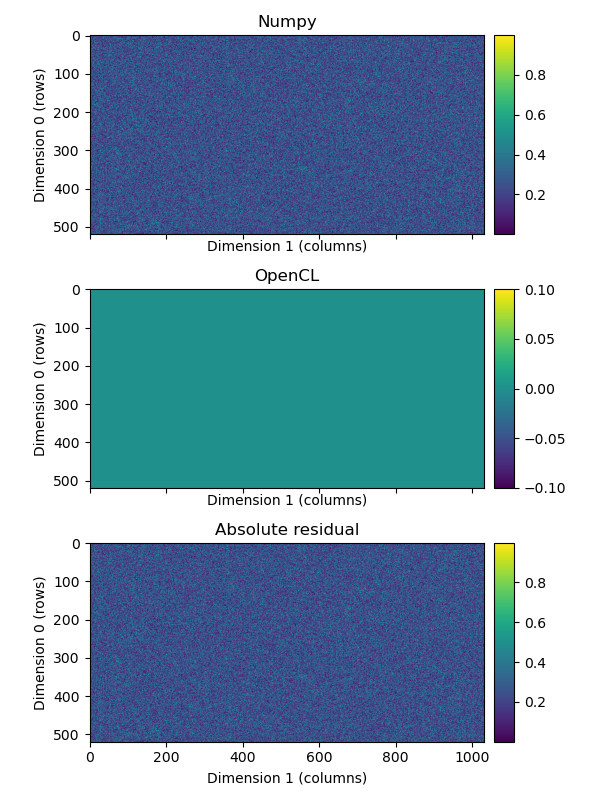

In [5]:
mat_mul.check_data()

## Tasks

In these set of tasks the aim is to solidify some of the understanding developed in the walkthrough of the code. We are going to read through the documentation of a function and implement some very simple kernel code.

1. In the source file [mat_elementwise.cpp](mat_elementwise.cpp) (line 126), re-enable the memory copy from **array_D** and **array_E** on the host to **buffer_D** and **buffer_E** using the function [clEnqueueWriteBuffer](https://www.khronos.org/registry/OpenCL/sdk/3.0/docs/man/html/clEnqueueWriteBuffer.html). Read the [documentation](https://www.khronos.org/registry/OpenCL/sdk/3.0/docs/man/html/clEnqueueWriteBuffer.html) for that function and implement the copies. It may also be helpful to download the latest [OpenCL C specification](https://www.khronos.org/registry/OpenCL/specs/3.0-unified/pdf/OpenCL_C.pdf) and find that function in there.
1. Complete the kernel source code in [kernels_elementwise.c](kernels_elementwise.c) so that a new value in buffer F at coordinates (i0,i1) is constructed from the corresponding values in buffers D and E.
    * Make sure you have a guard statement in place so that you don't overrun the bounds of buffer F. See the source code in [kernels_mat_mult.c](kernels_mat_mult.c) for an example.
    * Use multi-dimensional indexing as shown in the <a href="../L2_Survival_C++/Lesson - Survival C++.ipynb">Survival C++</a> Lesson to index into arrays.
    * If you get stuck you can just use the kernel from the answer in [kernels_elementwise_answer.c](kernels_elementwise_answer.c), just change line 124 of [mat_elementwise.cpp](mat_elementwise.cpp) to read in the kernel from the new source file.

